# Seasonality Sales Market

**Libraries**

In [4]:
import pandas as pd
import numpy as np

#Viz
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#warnings
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [3]:
data = pd.read_csv('SPY.csv', parse_dates=['Date'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-24,412.109985,415.109985,411.390015,413.670013,407.023438,49177800
1,2022-08-25,415.239990,419.559998,414.089996,419.510010,412.769562,50942300
2,2022-08-26,419.390015,419.959991,405.250000,405.309998,398.797699,103087000
3,2022-08-29,402.200012,405.839996,401.200012,402.630005,396.160797,65370800
4,2022-08-30,403.850006,404.100006,396.000000,398.209991,391.811798,85652400


### Daily Simple Return

In [5]:
data["DSR"] = data["Close"].pct_change(1)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DSR
0,2022-08-24,412.109985,415.109985,411.390015,413.670013,407.023438,49177800,NaN
1,2022-08-25,415.239990,419.559998,414.089996,419.510010,412.769562,50942300,0.014118
2,2022-08-26,419.390015,419.959991,405.250000,405.309998,398.797699,103087000,-0.033849
3,2022-08-29,402.200012,405.839996,401.200012,402.630005,396.160797,65370800,-0.006612
4,2022-08-30,403.850006,404.100006,396.000000,398.209991,391.811798,85652400,-0.010978


#### Log Return

In [8]:
#method 1:
data['Log_Return'] = np.log(data['Close']).diff()

#Method 2:
#np.log(1+ data["DSR"] )

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DSR,Log_Return
0,2022-08-24,412.109985,415.109985,411.390015,413.670013,407.023438,49177800,NaN,NaN
1,2022-08-25,415.239990,419.559998,414.089996,419.510010,412.769562,50942300,0.014118,0.014019
2,2022-08-26,419.390015,419.959991,405.250000,405.309998,398.797699,103087000,-0.033849,-0.034435
3,2022-08-29,402.200012,405.839996,401.200012,402.630005,396.160797,65370800,-0.006612,-0.006634
4,2022-08-30,403.850006,404.100006,396.000000,398.209991,391.811798,85652400,-0.010978,-0.011039


#### Get the month name and month number

In [9]:
data['month_name'] = data['Date'].dt.month_name()
data['month_number'] = data['Date'].dt.month

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DSR,Log_Return,month_name,month_number
0,2022-08-24,412.109985,415.109985,411.390015,413.670013,407.023438,49177800,NaN,NaN,August,8
1,2022-08-25,415.239990,419.559998,414.089996,419.510010,412.769562,50942300,0.014118,0.014019,August,8
2,2022-08-26,419.390015,419.959991,405.250000,405.309998,398.797699,103087000,-0.033849,-0.034435,August,8
3,2022-08-29,402.200012,405.839996,401.200012,402.630005,396.160797,65370800,-0.006612,-0.006634,August,8
4,2022-08-30,403.850006,404.100006,396.000000,398.209991,391.811798,85652400,-0.010978,-0.011039,August,8


#### Set Index

In [14]:
data.set_index('Date', inplace = True)

In [15]:
data.head(2)

,Open,High,Low,Close,Adj Close,Volume,DSR,Log_Return,month_name,month_number
Date,,,,,,,,,,
2022-08-24,412.109985,415.109985,411.390015,413.670013,407.023438,49177800,NaN,NaN,August,8
2022-08-25,415.239990,419.559998,414.089996,419.510010,412.769562,50942300,0.014118,0.014019,August,8


#### Group and store mean log returns in variable

In [52]:
log_returns = data.groupby('month_number')['Log_Return'].mean()*100
log_returns

month_number
1     0.304946
2    -0.134022
3     0.141729
4     0.083414
5     0.020934
6     0.281329
7     0.161045
8    -0.356820
9    -0.481436
10    0.372102
11    0.257625
12   -0.304462
Name: Log_Return, dtype: float64

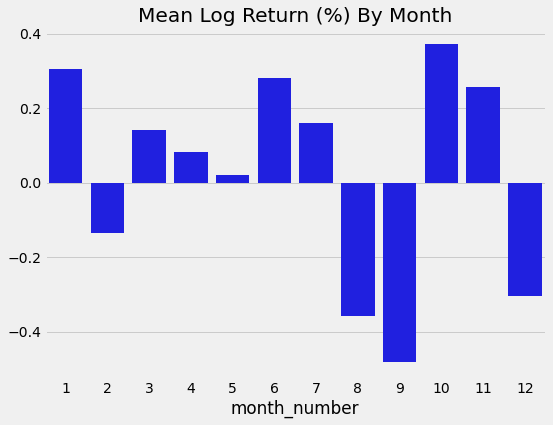

In [53]:
fig, ax = plt.subplots(figsize = [8,6])
sns.barplot(x = log_returns.index , y = log_returns.values, color = 'Blue', ax = ax)
plt.title('Mean Log Return (%) By Month')
plt.show()

#### Get Seanolity

In [35]:
#Method 1:
def get_seasonality(data):
    #Create empty list
    seasonality = []
    #loop through the data set
    for i in range(0,len(data) ):
        month = data['month_number'][i]
        #check if the month is between May(5) and October(10)
        if month >= 5 and month <= 10:
            seasonality.append('May_Oct')
        else:
            seasonality.append('Nov_Apr')

    return seasonality

In [49]:
#method2:
data['seasonality']=np.where((data['month_number']>=5) & (data['month_number']<=10), 'May_Oct','Nov_Apr' )

In [50]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,DSR,Log_Return,month_name,month_number,seasonality
Date,,,,,,,,,,,
2022-08-24,412.109985,415.109985,411.390015,413.670013,407.023438,49177800,NaN,NaN,August,8,May_Oct
2022-08-25,415.239990,419.559998,414.089996,419.510010,412.769562,50942300,0.014118,0.014019,August,8,May_Oct
2022-08-26,419.390015,419.959991,405.250000,405.309998,398.797699,103087000,-0.033849,-0.034435,August,8,May_Oct
2022-08-29,402.200012,405.839996,401.200012,402.630005,396.160797,65370800,-0.006612,-0.006634,August,8,May_Oct
2022-08-30,403.850006,404.100006,396.000000,398.209991,391.811798,85652400,-0.010978,-0.011039,August,8,May_Oct


In [64]:
seasons = round(data.groupby('seasonality')['Log_Return'].mean()*100,3)
seasons

seasonality
May_Oct   -0.004
Nov_Apr    0.060
Name: Log_Return, dtype: float64

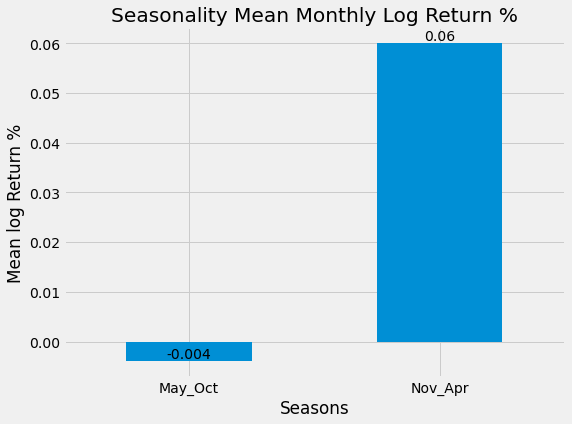

In [67]:
#Visual
fig, ax = plt.subplots(figsize = [8,6])
ax = seasons.plot(kind = 'bar', title = 'Seasonality Mean Monthly Log Return %')

#Add the values
for idx, value in enumerate(seasons):
    ax.annotate(str(value), xy=(idx, value), ha='center', va='bottom')

plt.xticks(rotation = 'horizontal')
plt.xlabel('Seasons')
plt.ylabel('Mean log Return %')
plt.show()